# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import seaborn as sns

In [2]:
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# verificando as 5 primeiras linhas do conjunto de dados
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [6]:
# verificando o resumo estatístico das variáveis numéricas
athletes.describe()

,id,height,weight,gold,silver,bronze
count,1.153800e+04,11208.000000,10879.000000,11538.000000,11538.000000,11538.000000
mean,4.999885e+08,1.766282,72.068205,0.057722,0.056769,0.061016
std,2.908648e+08,0.112719,16.177334,0.255910,0.239147,0.243320
min,1.834700e+04,1.210000,31.000000,0.000000,0.000000,0.000000
25%,2.450997e+08,1.690000,60.000000,0.000000,0.000000,0.000000
50%,5.002011e+08,1.760000,70.000000,0.000000,0.000000,0.000000
75%,7.539874e+08,1.840000,81.000000,0.000000,0.000000,0.000000
max,9.999878e+08,2.210000,170.000000,5.000000,2.000000,2.000000


In [7]:
# verificando o resumo estatístico das variáveis categóricas
athletes.describe(include=['O'])

,name,nationality,sex,dob,sport
count,11538,11538,11538,11537,11538
unique,11517,207,2,5595,28
top,Kuk Hyang Kim,USA,male,3/5/88,athletics
freq,2,567,6333,9,2363


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [8]:
# definindo a amostra
sample_height = get_sample(athletes, 'height', n=3000, seed=42)

def q1():   
    # realizando o teste
    pvalue = sct.shapiro(sample_height)[1]
    
    # retornando o resultado
    return pvalue > 0.05

q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

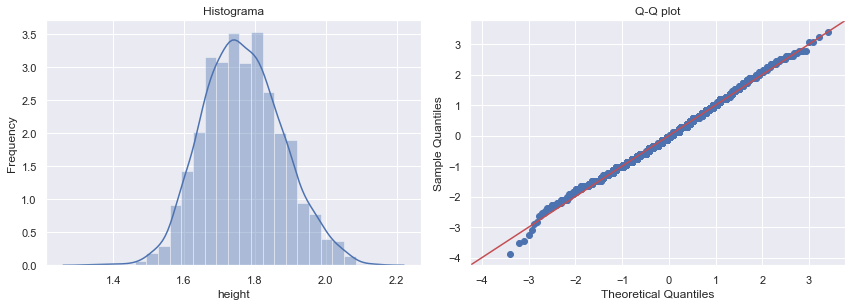

In [9]:
# plotando o gráfico de histograma na posição 1
ax1 = plt.subplot(221)

# contruindo o gráfico de histograma
sns.distplot(sample_height, bins=25, ax=ax1)

# inserindo o título no gráfico
plt.title("Histograma")

# inserindo a descrição da coluna y
plt.ylabel("Frequency")

# plotando o gráfico de histograma na posição 2
ax2 = plt.subplot(222)

# contruindo o gráfico de q-qplot
sm.qqplot(sample_height, fit=True, line='45', ax=ax2)

# inserindo o título no gráfico
plt.title("Q-Q plot")

# melhor distribuição no layout
plt.tight_layout()

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [10]:
def q2():
    # realizando o teste
    pvalue = sct.jarque_bera(sample_height)[1]
    
    # retornando o resultado
    return pvalue > 0.05

q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [11]:
# definindo a amostra
sample_weight = get_sample(athletes, 'weight', n=3000, seed=42)

def q3():
    # realizando o teste
    pvalue = sct.normaltest(sample_weight)[1]
    
    # retornando o resultado
    return pvalue > 0.05

q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

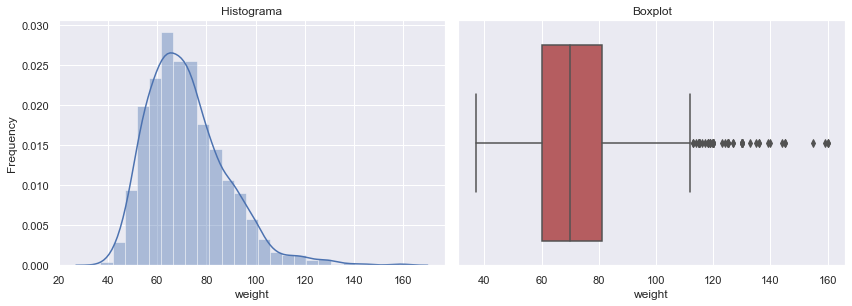

In [12]:
# plotando o gráfico de histograma na posição 1
ax1 = plt.subplot(221)

# contruindo o gráfico de histograma
sns.distplot(sample_weight, bins=25, ax=ax1)

# inserindo o título no gráfico
plt.title("Histograma")

# inserindo a descrição da coluna y
plt.ylabel("Frequency")

# plotando o gráfico de histograma na posição 2
ax2 = plt.subplot(222)

# contruindo o gráfico de q-qplot
sns.boxplot(sample_weight,ax=ax2, color='r')

# inserindo o título no gráfico
plt.title("Boxplot")

# melhor distribuição no layout
plt.tight_layout()

O boxplot nos ajuda a ver com clareza a quantidade de *outliers* presentes na amostra

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [13]:
# fazendo a transformação logaritmica
sample_transf = np.log(sample_weight)

def q4():   
    # realizando o teste
    pvalue = sct.shapiro(sample_transf)[1]
    
    # retornando o resultado
    return pvalue > 0.05

q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

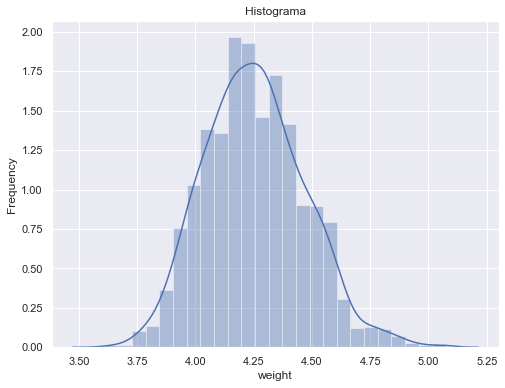

In [14]:
# configurando o tamanho da área de plotagem
plt.figure(figsize=(8, 6))

# contruindo o gráfico de histograma
sns.distplot(sample_transf, bins=25)

# inserindo o título no gráfico
plt.title("Histograma")

# inserindo a descrição da coluna y
plt.ylabel("Frequency");

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [15]:
# definindo os dataframes para as nacionalidades
bra = athletes[athletes.nationality == 'BRA']
usa = athletes[athletes.nationality == 'USA']
can = athletes[athletes.nationality == 'CAN']

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [16]:
def q5():
    # realizando o teste
    pvalue = sct.ttest_ind(bra.height, usa.height, equal_var=False, nan_policy='omit')[1]
    
    # retornando o resultado
    return pvalue > 0.05

q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [17]:
def q6():
    # realizando o teste
    pvalue = sct.ttest_ind(bra.height, can.height, equal_var=False, nan_policy='omit')[1]
    
    # retornando o resultado
    return pvalue > 0.05

q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [18]:
def q7():
    # realizando o teste
    pvalue = sct.ttest_ind(usa.height, can.height, equal_var=False, nan_policy='omit')[1]
    
    # retornando o resultado
    return round(pvalue, 8)

q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?